In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [5]:
#Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [6]:
#Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

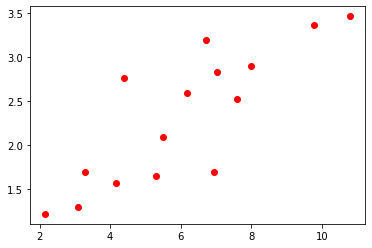

In [7]:
plt.plot(x_train,y_train,'ro')

In [8]:
#Linear regression model
model = torch.nn.Linear(input_size,output_size)

In [9]:
#Loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [10]:
#Train the model
for epoch in range(num_epochs):
    #Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    #Forward pass
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    
    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 5 == 0:
        print("Epoch[{}/{}], Loss:{:.4f}".format(epoch+1,num_epochs,loss.item()))

Epoch[5/60], Loss:14.4099
Epoch[10/60], Loss:5.9520
Epoch[15/60], Loss:2.5255
Epoch[20/60], Loss:1.1373
Epoch[25/60], Loss:0.5749
Epoch[30/60], Loss:0.3470
Epoch[35/60], Loss:0.2547
Epoch[40/60], Loss:0.2172
Epoch[45/60], Loss:0.2020
Epoch[50/60], Loss:0.1958
Epoch[55/60], Loss:0.1933
Epoch[60/60], Loss:0.1922


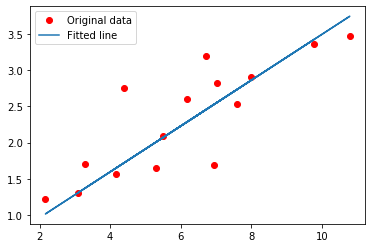

In [16]:
#plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train,y_train,'ro',label = "Original data")
plt.plot(x_train,predicted,label = "Fitted line")
plt.legend()
plt.show()

In [12]:
torch.save(model.state_dict(),'model.ckpt')

In [18]:
model.weight.item()

0.3160858750343323

In [19]:
model.bias.item()

0.3317549526691437